<a href="https://colab.research.google.com/github/rashmi0888/Deep-Learning/blob/master/RNN/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recurrent Neural Network for MNIST Dataset

### Import relevant components

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import itertools
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
np.random.seed(100)
# Disable warnings
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

Using TensorFlow backend.


### Data Preparation
#### 1. Data Dimensions
There are two ways to apply RNN:
1. Give a 784x1 dimension input to RNN. It means that RNN cells are seeing a pixel. Total no of timesteps is 784.
2.Give a 28x28 dimension input to RNN. It means that RNN cells are looking at a row of image which is a vector of size 28. Total no of timesteps = 28.

First case is a lot harder because a decent model has to keep a very long-term memory. Hence using second way here.

In [0]:
training_samples = 60000
test_samples = 10000
num_output_classes = 10
num_units = 512
input_shape = (28, 28)

#### 2. Download and Normalize Data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

#### 3. One hot encoding

In [0]:
Y_train = keras.utils.to_categorical(y_train, num_output_classes)
Y_test = keras.utils.to_categorical(y_test, num_output_classes)

#### 4. Shuffle Data

In [6]:
random_index = np.random.permutation(X_train.shape[0])
X_train, Y_train, y_train = X_train[random_index], Y_train[random_index], y_train[random_index]
print('No of training samples: ', X_train.shape[0])
print('No of test samples: ', X_test.shape[0])

No of training samples:  60000
No of test samples:  10000


### Train Model
#### 1. Build model
1. Build an RNN configuration having 1 layer with 512 units.
   
#### 2. Compile model
1. After building model, configure the learning process.
2. Use SGD optimizer and momentum parameter in learning.

#### 3. Fit model
1. Fit the model built above into the data.
2. Out of 60,000 traning samples, use 10,000 samples for validation.
3. Save metrics in history to later use them for plotting performance.
4. Also log metrics after each epoch into a csv file.

#### 4. Evaluate model
1. Evaluate model on test set.
2. Plot training and validation accuracy as a function of epochs.

In [0]:
def train_model(learning_rate, batch_size, dropout, epochs):
    # Bulid model
    model = Sequential()
    model.add(SimpleRNN(num_units, input_shape=input_shape, activation='tanh', dropout=dropout))
    #model.add(BatchNormalization()) # use it to see influence of batch normalization
    model.add(Dense(num_output_classes, activation='softmax'))
    #model.summary()

    # Compile model
    sgd = SGD(lr=learning_rate, momentum=0.9, decay=1e-6)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    csv_logger = CSVLogger("model_history_log_rnn.csv", append=True)
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.16666,
                        shuffle=True, callbacks=[csv_logger])
    #print('Train Accuracy:{}, Validation Accuracy:{}'.format(history.history['acc'][-1], history.history['val_acc'][-1])) 
    
    # Evaluate model on test set
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test Loss:', score[0])
    print('Test Accuracy:', score[1])

    # Plot accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title("LR:{}, BS:{}".format(learning_rate, batch_size), pad=-20)
    #plt.title("dropout:{}".format(dropout), pad=-20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')

### Influence of learning rate and batch size on performance

Learning_rate: 0.01, Batch_size: 32
Test Loss: 0.5974292128562927
Test Accuracy: 0.8147
Learning_rate: 0.01, Batch_size: 128
Test Loss: 0.06029888408882544
Test Accuracy: 0.9818
Learning_rate: 0.1, Batch_size: 32
Test Loss: 14.573981648254394
Test Accuracy: 0.0958
Learning_rate: 0.1, Batch_size: 128
Test Loss: 14.288691453552246
Test Accuracy: 0.1135


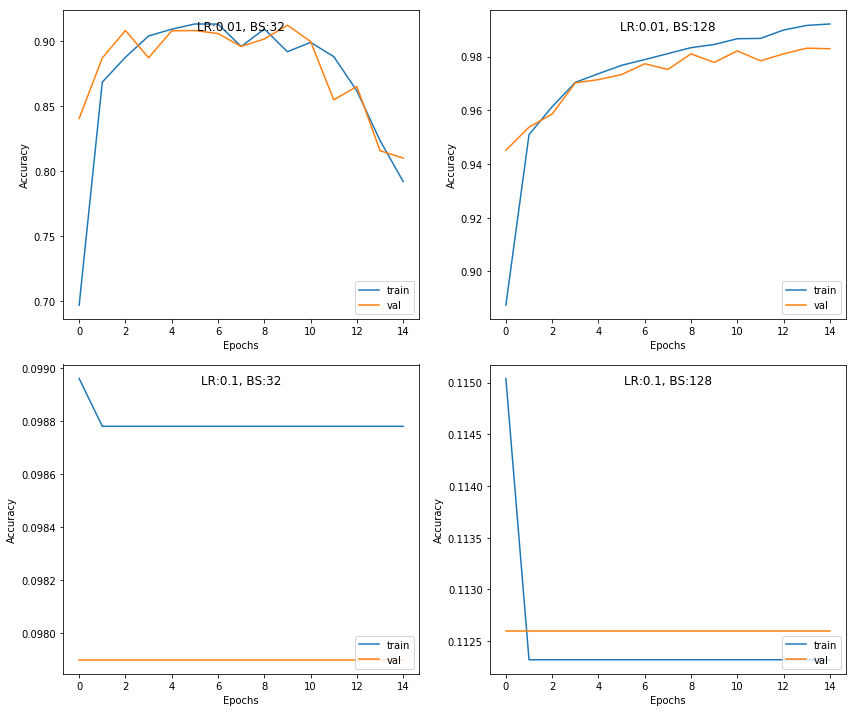

In [8]:
learning_rate = [0.01, 0.1]
batch_size = [32, 128]
grid = list(itertools.product(learning_rate, batch_size))
plt.figure(figsize=(12, 10))
for params in grid:
    print("Learning_rate: {}, Batch_size: {}".format(params[0], params[1]))
    plt.subplot(2, 2, grid.index(params) + 1)
    train_model(params[0], params[1], dropout=0, epochs = 15)
plt.tight_layout()
plt.show()

1. For learning rate = 0.01, high validation and test accuracy of ~98% are achieved for batch size = 128. For batch size = 32, performance drops as training progresses.
2. For learning rate = 0.1, low accuracies of ~10%  are achieved irrespective of batch size. This may be because learning rate is too high and model fails to converge.
3. The value of ~10% accuracy could be interpreted as if network is uniformly and randomly
classifying digits, hence no learning taking place.


### Influence of batch normalization on performance

Learning_rate: 0.01, Batch_size: 32
Test Loss: 2.3040831558227537
Test Accuracy: 0.1028
Learning_rate: 0.01, Batch_size: 128
Test Loss: 0.07191812731795945
Test Accuracy: 0.9806
Learning_rate: 0.1, Batch_size: 32
Test Loss: 2.305802102661133
Test Accuracy: 0.1009
Learning_rate: 0.1, Batch_size: 128
Test Loss: 2.5857148361206055
Test Accuracy: 0.1032


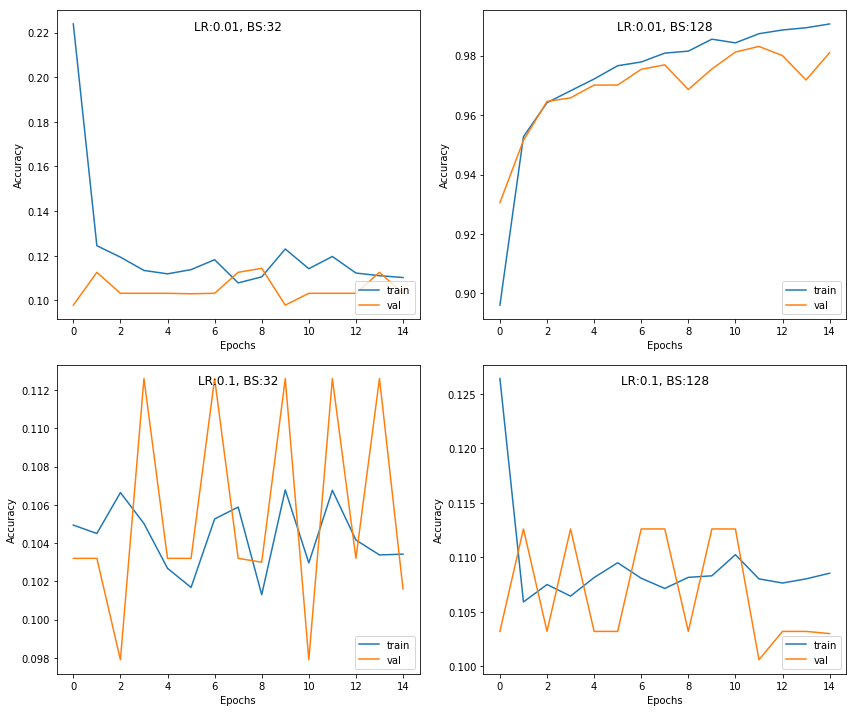

In [10]:
learning_rate = [0.01, 0.1]
batch_size = [32, 128]
grid = list(itertools.product(learning_rate, batch_size))
plt.figure(figsize=(12, 10))
for params in grid:
    print("Learning_rate: {}, Batch_size: {}".format(params[0], params[1]))
    plt.subplot(2, 2, grid.index(params) + 1)
    train_model(params[0], params[1], dropout=0, epochs = 15)
plt.tight_layout()
plt.show()

#### Influence on validation and test accuracy
1. For learning rate = 0.01 and batch size = 128, almost same validation and test accuracy are
observed as that without using batch normalization. 
2. For learning rate = 0.01 and batch size = 32, performance drops to ~10% test accuracy when compared with 80% test accuracy without batch normalization. Thus here BN is hurting performance.
3. For other combinations, the plots become more noisy, although they still fail to reach
reasonable values for accuracy.

#### Influence on speed
1. By normalizing the inputs to the activations, batch normalization significantly reduces the training time of network.

### Influence of dropout on performance

1. Learning rate = 0.01 and batch size = 128 are fixed. 
2. Dropout is varied from 0.0 to 0.8.
3. Values of train, validation and test accuracy after last epoch are printed.

Dropout: 0.0
Train Accuracy:0.9943200000190735, Validation Accuracy:0.9817
Test Accuracy: 0.9828
Dropout: 0.1
Train Accuracy:0.9864400000190735, Validation Accuracy:0.9816
Test Accuracy: 0.9831
Dropout: 0.2
Train Accuracy:0.9815600000190735, Validation Accuracy:0.9824
Test Accuracy: 0.9821
Dropout: 0.3
Train Accuracy:0.9718599999809265, Validation Accuracy:0.9817
Test Accuracy: 0.9826
Dropout: 0.4
Train Accuracy:0.96294, Validation Accuracy:0.9797
Test Accuracy: 0.9811
Dropout: 0.5
Train Accuracy:0.948400000038147, Validation Accuracy:0.9762
Test Accuracy: 0.978
Dropout: 0.6
Train Accuracy:0.92488, Validation Accuracy:0.9736
Test Accuracy: 0.9763
Dropout: 0.7
Train Accuracy:0.88758, Validation Accuracy:0.966
Test Accuracy: 0.9706
Dropout: 0.8
Train Accuracy:0.8000600000190735, Validation Accuracy:0.946
Test Accuracy: 0.9552


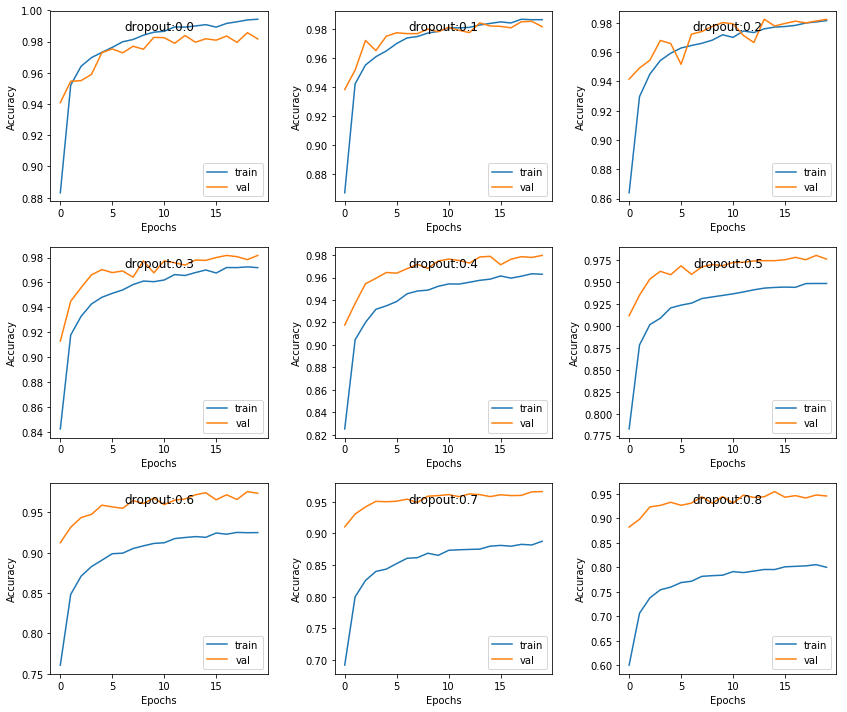

In [25]:
dropout = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
plt.figure(figsize=(12, 10))
for i in range(len(dropout)):
    print("Dropout: {}".format(dropout[i]))
    plt.subplot(3, 3, i + 1)
    train_model(0.01, 128, dropout[i], epochs = 20)
plt.tight_layout()
plt.show()

1. For dropout = 0.1 and 0.2, gap between train and validation accuracy decreases. This shows that dropout is helping in preventing overfitting.
2. For values of dropout >0.2, both train and validation accuracy drops, former dropping much faster than latter, and gap between them increase. This is because too much of regularization causes model to underfit the data.
3. Dropout of 0.2 gives highest validation accuracy. Thus test accuracy of 98.21% is best performance for algorithm.
3. Thus optimum values of dropout help improve performance of model. This optimum value is different for different learning rate and batch size combinations.